In [84]:
from numpy import  float32
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def read_signals(filename):
    file = open(filename,'r')
    data = file.read().splitlines(keepends=False)
    data = map(lambda x: x.rstrip().lstrip().split(),data)
    data = [list(map(float,line)) for line in data]
    data = np.array(data,dtype = float32)
    return data

def read_labels(filename):
    file = open(filename,'r')
    activities = file.read().splitlines()
    activities =list(map(int,activities))
    return np.array(activities)

def randomize(dataset,labels):
    permetuation = np.random.permutation(labels.shape[0])
    shuffled_data = dataset[permetuation,:,:]
    shuffled_labels = labels[permetuation]
    return shuffled_data,shuffled_labels

In [86]:
INPUT_FOLDER_TRAIN = 'C:\\Users\\peter\\Desktop\\eog\\data\\UCI HAR Dataset\\train\\Inertial Signals'
INPUT_FOLDER_TEST = 'C:\\Users\\peter\\Desktop\\eog\\data\\UCI HAR Dataset\\test\Inertial Signals'

INPUT_FILE_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                    'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                    'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILE_TEST = [ 'body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                    'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                    'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

In [87]:
train_signals , test_signals = [],[]   
for INPUT_FILE in INPUT_FILE_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN +'\\'+ INPUT_FILE)
    train_signals.append(signal)

train_signals = np.array(train_signals)
train_signals = np.transpose(train_signals,(1,2,0))

for INPUT_FILE in INPUT_FILE_TEST:
    signal = read_signals(INPUT_FOLDER_TEST +'\\'+ INPUT_FILE)
    test_signals.append(signal)

test_signals = np.array(test_signals)
test_signals = np.transpose(test_signals,(1,2,0))

In [88]:
LABELFILE_TRAIN = 'C:\\Users\\peter\\Desktop\\eog\\data\\UCI HAR Dataset\\train\\y_train.txt'
LABELFILE_TEST =  'C:\\Users\\peter\\Desktop\\eog\\data\\UCI HAR Dataset\\test\\y_test.txt'
train_labels = read_labels(LABELFILE_TRAIN)
test_lables = read_labels(LABELFILE_TEST)

train_signals,train_labels = randomize(train_signals,np.array(train_labels))
test_signals,test_lables = randomize(test_signals,np.array(test_lables))

In [89]:
def get_values(y_values,T,N,f_s):
    y_values = y_values
    x_values = [f_s * KK for KK in range(0,len(y_values)) ]
    return x_values,y_values

'''GETTING THE FREQUENCY DOMAIN OF SIGNAL'''
def get_fft_values(y_values,T,N,d_s):
    f_values = np.linspace(0.0, 1/(2.0 * T),N//2)
    fft_values = np.fft.fft(y_values)
    fft_values = 2.0 /N * np.abs(fft_values[0:N//2])
    return f_values,fft_values

'''GETTTING THE POWER SPECTRAL DENSITY'''
from scipy.signal import welch
def get_psd_values(yvalues,T,N,f_s):
    f_values, psd_values = welch(yvalues,fs=f_s ,nperseg= 128)
    return f_values, psd_values

'''GETTING THE AUTO CORRELATION OF THE SIGNAL'''
#Calculates correlation of the signal with a time dlayed function of itself
def autocorr(x):
    result = np.correlate(x,x,mode = 'full')
    return result[len(result)//2 :]

def get_autocorr_values(yvalues, T, N,f_s):
    y_values = np.array(yvalues)
    autocorr_values = autocorr(yvalues)
    x_values = np.array([T * jj for jj in range(0,N)])
    return x_values,autocorr_values

def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.
    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height.
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).
    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.
    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 
    See this IPython Notebook [1]_.
    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)
    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)
    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)
    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=0, mpd=20, valley=True, show=True)
    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)
    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind

In [90]:
labels = ['x-component','y-component','z-component']
colors = ['r', 'g', 'b']
subtitle = "Different signals for the activity"
xlabels = ['Time [sec]', 'Freq [Hz]', 'Freq [Hz]', 'Time lag [s]']
ylabel = 'Amplitude'
axtitles =[['Acceleration', 'Gyro', 'Total acceleration'],
            ['FFT acc', 'FFT gyro', 'FFT total acc'],
            ['PSD acc', 'PSD gyro', 'PSD total acc'],
            ['Autocorr acc', 'Autocorr gyro', 'Autocorr total acc']]

In [91]:
list_functions = [get_values,get_fft_values,get_psd_values,get_autocorr_values]

In [92]:
N = 128
f_s = 50
t_n = 2.56
T = t_n/N

In [93]:
signal_no = 0
signals = train_signals[signal_no, : ,:]
label = train_labels[signal_no]

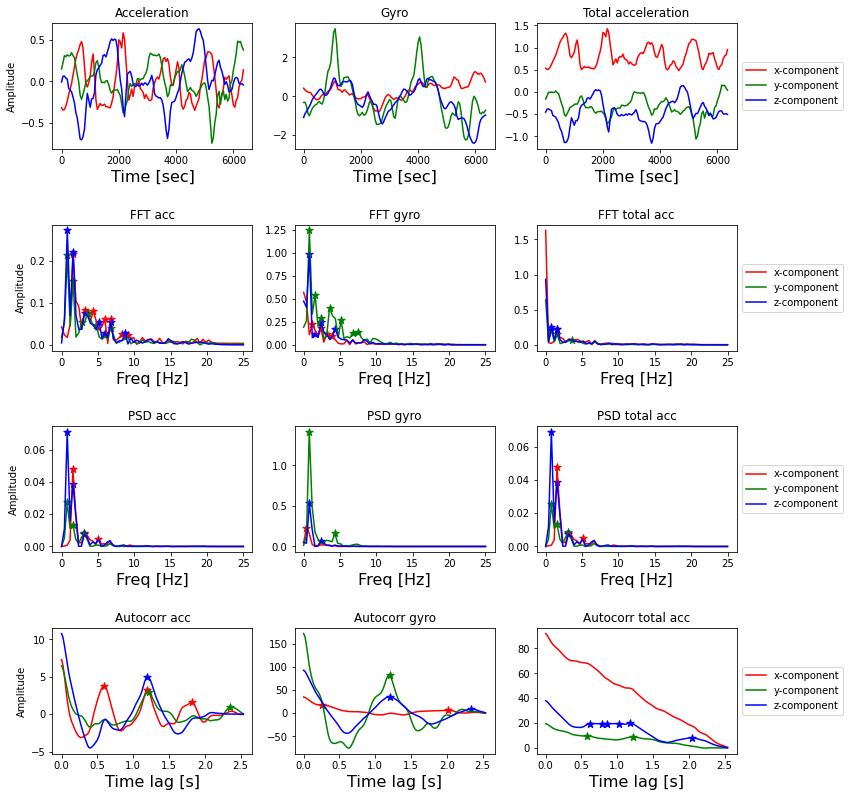

In [94]:
f, axarr = plt.subplots(nrows=4, ncols=3, figsize=(12,12))

for row in range (0,4):
    for comp in range(0,9):
        col = comp//3
        plot = comp%3
        color = colors[plot]
        label = labels[plot]

        axtitle = axtitles[row][col]
        xlabel = xlabels[row]
        value_retriever = list_functions[row]
        

        ax =axarr[row,col]
        ax.set_title(axtitle)
        ax.set_label(xlabel)
        ax.set_xlabel(xlabel, fontsize=16)
        if(col == 0 ):
            ax.set_ylabel(ylabel)

        signal_component = signals[:,comp]
        x_values,y_values = value_retriever(signal_component,T,N,f_s)
        ax.plot(x_values,y_values,color=color,label = label)

        if row > 0:
            max_peak_height = 0.1 * np.nanmax(y_values)
            indices_peaks = detect_peaks(y_values, mph=max_peak_height)
            ax.scatter(x_values[indices_peaks], y_values[indices_peaks], c=color, marker='*', s=60)

        if col == 2:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.6)
plt.show() 


In [98]:
def get_first_n_peaks(x,y,no_peaks=5):
    x_,y_ = list(x),list(y)
    if len(x) >= no_peaks:
        return x_[:no_peaks],y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks - len(x)
        return x_ + [0] * missing_no_peaks, y_+ [0] *missing_no_peaks

def get_featues(x_values,y_values,mph):
    indices_peaks = detect_peaks(x_values,mph=mph)
    peaks_x,peaks_y =  get_first_n_peaks(x_values[indices_peaks],y_values[indices_peaks])
    return peaks_x + peaks_y

def extract_feature_labels(dataset,labels,T,N,f_s,denominator):
    percentile = 5
    list_of_features =[]
    list_of_labels = []
    for signal_no in range(0,len(dataset)):
        features = []
        list_of_labels.append(labels[signal_no])
        for signal_comp in range (0,dataset.shape[2]):
            signal = dataset[signal_no,:,signal_comp]

            signal_min = np.nanpercentile(signal,percentile)
            signal_max = np.nanpercentile(signal,100 - percentile)
            mph = signal_min  + (signal_max - signal_min)/denominator

            features += get_featues(*get_psd_values(signal,T,N,f_s),mph)
            features += get_featues(*get_fft_values(signal,T,N,f_s),mph)
            features += get_featues(*get_autocorr_values(signal,T,N,f_s),mph)
        
        list_of_features.append(features)
    return np.array(list_of_features),np.array(list_of_labels)
    
denominator = 10
X_train,Y_train = extract_feature_labels(train_signals,train_labels,T,N,f_s,denominator)
X_test,Y_test = extract_feature_labels(test_signals,test_lables,T,N,f_s,denominator)


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

Accuracy on training set is : 0.1913764961915125
Accuracy on test set is : 0.18221920597217509
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       532
           6       0.18      1.00      0.31       537

    accuracy                           0.18      2947
   macro avg       0.03      0.17      0.05      2947
weighted avg       0.03      0.18      0.06      2947



C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.9\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
